In [3]:
print("Hello World")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

Hello World


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
lines = []
for line in open('/content/drive/MyDrive/Aps360 Project/Datasets/train_sentiment.csv'):
    lines.append(line)

for i in range(10):
  print(lines[i])


"1","Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars."

"2","Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. 

In [6]:
lines = []
total=0
positive=0
negative=0
for line in open('/content/drive/MyDrive/Aps360 Project/Datasets/train_sentiment.csv'):
    label,message = line.split(",",1)
    if label == '\"1\"':
      negative += 1
    if label == '\"2\"':
      positive += 1
    total += 1
print("positive: ",positive)
print("negative: ",negative)
print("total: ",total)

positive:  280000
negative:  280000
total:  560000


In [7]:
import torchtext.legacy as torchtext
import random

text_field = torchtext.data.Field(sequential=True,      # text sequence
                                  tokenize=lambda x: x, # because are building a character-RNN
                                  include_lengths=True, # to track the length of sequences, for batching
                                  batch_first=True,
                                  use_vocab=True)       # to turn each character into an integer index
label_field = torchtext.data.Field(sequential=False,    # not a sequence
                                   use_vocab=False,     # don't need to track vocabulary
                                   is_target=True,      
                                   batch_first=True,
                                   preprocessing=lambda x: int(x == '2')) # convert text to 0 and 1

fields = [('label', label_field), ('review', text_field)]

train_dataPath = "/content/drive/MyDrive/Aps360 Project/Datasets/train_sentiment.csv"
test_dataPath = "/content/drive/MyDrive/Aps360 Project/Datasets/test_sentiment.csv"

train_dataset = torchtext.data.TabularDataset(train_dataPath, # name of the file
                                        "csv",               # fields are separated by a comma
                                        fields)

train,val = train_dataset.split([0.8,0.2],True,'label',random.getstate())
test = torchtext.data.TabularDataset(test_dataPath, # name of the file
                                        "csv",               # fields are separated by a comma
                                        fields)
train, remaining_train = train.split([0.01,0.99],True,'label',random.getstate())
val, remaining_val = val.split([0.02,0.98],True,'label',random.getstate())
test, remaining_test = test.split([0.03,0.97],True,'label',random.getstate())

In [8]:

lines = []
total=0
positive=0
negative=0
for line in train:
  if line.label == 0:
    negative += 1
  if line.label == 1:
    positive += 1
  total += 1
print("positive training: ",positive)
print("negative training : ",negative)
print("total training: ",total)


lines = []
total=0
positive=0
negative=0
for line in val:
  if line.label == 0:
    negative += 1
  if line.label == 1:
    positive += 1
  total += 1
print("\npositive validation: ",positive)
print("negative validation : ",negative)
print("total validation: ",total)

lines = []
total=0
positive=0
negative=0
for line in test:
  if line.label == 0:
    negative += 1
  if line.label == 1:
    positive += 1
  total += 1
print("\npositive test: ",positive)
print("negative test : ",negative)
print("total test: ",total)

positive training:  2240
negative training :  2240
total training:  4480

positive validation:  1120
negative validation :  1120
total validation:  2240

positive test:  570
negative test :  570
total test:  1140


In [9]:
import builtins
text_field.build_vocab(train)
all_values = text_field.vocab.stoi.values()
print(all_values)
max_value = builtins.max(all_values)
print(max_value)

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94])
94


In [10]:
print(text_field.vocab.itos)
print(text_field.vocab.stoi)

['<unk>', '<pad>', ' ', 'e', 't', 'a', 'o', 'n', 'i', 's', 'r', 'h', 'd', 'l', 'u', 'c', 'w', 'y', 'm', 'f', 'g', 'p', '.', 'b', 'v', 'k', 'I', ',', '\\', 'T', "'", '!', 'S', 'A', 'x', 'W', '-', '0', 'O', 'M', 'z', 'j', 'E', 'B', 'C', 'N', '"', 'H', ')', '(', 'L', 'F', 'P', 'R', '1', 'D', 'q', 'G', '2', '5', 'V', '?', 'Y', '$', '3', ':', '4', '/', 'U', '9', 'K', 'J', '&', '8', '6', '*', '7', ';', 'Q', 'Z', '=', '%', '+', '#', 'X', '_', '~', '@', '^', ']', '[', '`', '{', '|', '}']
defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7fab5197ac90>>, {'<unk>': 0, '<pad>': 1, ' ': 2, 'e': 3, 't': 4, 'a': 5, 'o': 6, 'n': 7, 'i': 8, 's': 9, 'r': 10, 'h': 11, 'd': 12, 'l': 13, 'u': 14, 'c': 15, 'w': 16, 'y': 17, 'm': 18, 'f': 19, 'g': 20, 'p': 21, '.': 22, 'b': 23, 'v': 24, 'k': 25, 'I': 26, ',': 27, '\\': 28, 'T': 29, "'": 30, '!': 31, 'S': 32, 'A': 33, 'x': 34, 'W': 35, '-': 36, '0': 37, 'O': 38, 'M': 39, 'z': 40, 'j': 41, 'E': 42, 'B': 43, 'C': 44

In [11]:
train_iter = torchtext.data.BucketIterator(train,
                                           batch_size=16,
                                           sort_key=lambda x: len(x.review), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs
val_iter = torchtext.data.BucketIterator(val,
                                           batch_size=16,
                                           sort_key=lambda x: len(x.review), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs
test_iter = torchtext.data.BucketIterator(test,
                                           batch_size=16,
                                           sort_key=lambda x: len(x.review), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs                                          
                                     

In [12]:
i=0
for batch in train_iter:
  max_val = batch.review[1][0]
  print("Length of longest review: ", max_val.item())
  print("Pads used: ", max_val.item()*len(batch.review[1]) - batch.review[1].sum().item())
  i+=1
  if i>=10:
    break

Length of longest review:  703
Pads used:  105
Length of longest review:  1177
Pads used:  298
Length of longest review:  342
Pads used:  64
Length of longest review:  249
Pads used:  73
Length of longest review:  1009
Pads used:  170
Length of longest review:  1477
Pads used:  386
Length of longest review:  278
Pads used:  52
Length of longest review:  979
Pads used:  359
Length of longest review:  332
Pads used:  96
Length of longest review:  543
Pads used:  117


In [13]:
#Demonstration of how eye() works.
ident = torch.eye(10)
print(ident[0]) # one-hot vector
print(ident[1]) # one-hot vector
x = torch.tensor([[1, 2], [3, 4]])
print(ident[x]) # one-hot vectors

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]])


In [14]:
import builtins

def getOneHotBatch(batch_review):
  ident = torch.eye(builtins.max(text_field.vocab.stoi.values())+1)
  return ident[batch_review]

In [15]:
class ReviewRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ReviewRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        # Set an initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

In [16]:
def get_accuracy(model, iter):
    """ Compute the accuracy of the `model` across a dataset `data`
    
    Example usage:
    
    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid) # the variable `valid` is from above
    """
    correct, total = 0, 0
    for review_batch, labels in iter:
        one_hot_review = getOneHotBatch(review_batch[0])
        output = model(one_hot_review)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total

In [17]:
def get_model_name(name, hidden_size, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_{1}_bs{2}_lr{3}_epoch{4}".format(name,hidden_size,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [18]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_accuracy = np.loadtxt("{}_train_accuracy.csv".format(path))
    val_accuracy = np.loadtxt("{}_val_accuracy.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))

    plt.title("Train vs Validation Accuracy")
    n = len(train_accuracy) # number of epochs
    plt.plot(range(1,n+1), train_accuracy, label="Train")
    plt.plot(range(1,n+1), val_accuracy, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [19]:
import matplotlib.pyplot as plt
basePath = "/content/drive/MyDrive/Aps360 Project/Datasets/SentimentAnalysis"
def train_rnn_network(model,train_iter, val_iter, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for review_batch, labels in train_iter:
            optimizer.zero_grad()
            one_hot_review = getOneHotBatch(review_batch[0])
            pred = model(one_hot_review)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_iter))
        valid_acc.append(get_accuracy(model, val_iter))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
        
        model_name = get_model_name("RNN",model.hidden_size,train_iter.batch_size,
                                    learning_rate,epoch)
        torch.save(model.state_dict(), "{}/{}".format(basePath,model_name))

    np.savetxt("{}/{}_train_loss.csv".format(basePath, model_name), losses)
    np.savetxt("{}/{}_train_accuracy.csv".format(basePath, model_name), train_acc)
    np.savetxt("{}/{}_val_accuracy.csv".format(basePath, model_name), valid_acc)
    

In [ ]:
model = ReviewRNN(input_size = builtins.max(all_values) + 1, hidden_size = 150,
                  num_classes = 2)
train_rnn_network(model=model,train_iter=train_iter,val_iter=val_iter,
                  num_epochs=100,learning_rate=1e-05)

Epoch 1; Loss 0.717116; Train Acc 0.500670; Val Acc 0.501339
Epoch 2; Loss 0.695303; Train Acc 0.503348; Val Acc 0.501339
Epoch 3; Loss 0.696738; Train Acc 0.520759; Val Acc 0.519643
Epoch 4; Loss 0.694820; Train Acc 0.516295; Val Acc 0.512500
Epoch 5; Loss 0.695053; Train Acc 0.517188; Val Acc 0.508929
Epoch 6; Loss 0.691126; Train Acc 0.533705; Val Acc 0.519643
Epoch 7; Loss 0.692062; Train Acc 0.525446; Val Acc 0.512054
Epoch 8; Loss 0.693202; Train Acc 0.520759; Val Acc 0.523214
Epoch 9; Loss 0.693103; Train Acc 0.527455; Val Acc 0.510714
Epoch 10; Loss 0.688241; Train Acc 0.533482; Val Acc 0.525893
Epoch 11; Loss 0.689493; Train Acc 0.525223; Val Acc 0.533036
Epoch 12; Loss 0.696450; Train Acc 0.533705; Val Acc 0.517411
Epoch 13; Loss 0.689585; Train Acc 0.530580; Val Acc 0.524554
Epoch 14; Loss 0.691159; Train Acc 0.526339; Val Acc 0.526786
Epoch 15; Loss 0.695244; Train Acc 0.528125; Val Acc 0.513839
Epoch 16; Loss 0.693476; Train Acc 0.529018; Val Acc 0.527232
Epoch 17; Loss 0.

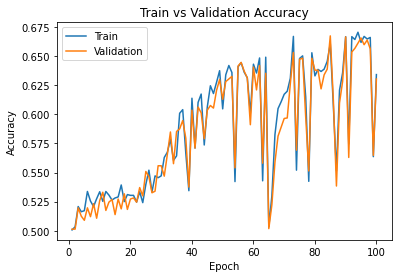

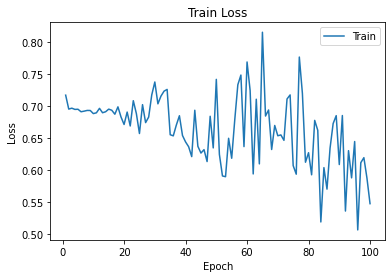

In [26]:
basePath = "/content/drive/MyDrive/Aps360 Project/Datasets/SentimentAnalysis"
epochs=100
modelPath = get_model_name("RNN", hidden_size=150, batch_size=16, learning_rate=1e-5, epoch=epochs-1)
plot_training_curve("{}/{}".format(basePath,modelPath))